In [5]:
import pickle

# Path to one of your .pkl graph files
filepath = "../data/Multi Level Jet Tagging/Emitter-Higgs_HToBB.pkl"

# Load and inspect the file contents
with open(filepath, 'rb') as f:
    data = pickle.load(f)

# Print the type and content
print(f"Type of data loaded: {type(data)}")

# If it's a list, check its first element
if isinstance(data, list) and len(data) > 0:
    print(f"First element type: {type(data[0])}")
    print(f"First element content (preview): {data[0]}")


/media/drive1/jettag/env_jet/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Type of data loaded: <class 'list'>
First element type: <class 'dgl.heterograph.DGLGraph'>
First element content (preview): Graph(num_nodes=38, num_edges=114,
      ndata_schemes={'feat': Scheme(shape=(16,), dtype=torch.float32)}
      edata_schemes={})


In [6]:
import os
import pickle
import dgl
import igraph as ig
import torch

# Path to your dataset folder
source_folder = '../data/Multi Level Jet Tagging/'

# Function to convert DGL heterogeneous graph to igraph
def dgl_to_igraph(dgl_graph):
    src, dst = dgl_graph.edges()  # Extract edges from DGL graph
    edges = list(zip(src.tolist(), dst.tolist()))  # Convert to list of tuples
    ig_graph = ig.Graph(edges=edges, directed=True)  # Create igraph
    
    return ig_graph

# Function to load and convert the first DGL graph from a pickle file
def load_graph(filepath):
    with open(filepath, 'rb') as f:
        data = pickle.load(f)  # Load the pickle file

    # Ensure the file contains a list of graphs
    if isinstance(data, list) and len(data) > 0 and isinstance(data[0], dgl.DGLGraph):
        print(f"Loaded {len(data)} graphs from {filepath}")
        return dgl_to_igraph(data[0])  # Convert the first graph only
    
    else:
        raise ValueError(f"Unsupported graph format in {filepath}")

# Process first 10 graphs for each jet type
for jet_type in os.listdir(source_folder):
    files = sorted([f for f in os.listdir(source_folder) if jet_type in f and f.endswith('.pkl')])[:10]

    print(f"\nProcessing first 10 graphs for: {jet_type}")

    for file in files:
        filepath = os.path.join(source_folder, file)

        try:
            g = load_graph(filepath)  # Convert first DGL graph to igraph

            # Apply igraph methods
            print(f"\nGraph: {file}")
            print(f"Nodes: {g.vcount()}, Edges: {g.ecount()}")
            print(f"Connected Components: {len(g.connected_components())}")
            print(f"Is Connected: {g.is_connected()}")
            print(f"Biconnected Components: {len(g.biconnected_components())}")
            print(f"Articulation Points: {len(g.articulation_points())}")
            print(f"Bridges: {len(g.bridges())}")

            # Compute a spanner
            try:
                spanner_edges = g.spanner(stretch=2)
                spanner_graph = g.subgraph_edges(spanner_edges, delete_vertices=False)
                print(f"Spanner Edges Reduced: {spanner_graph.ecount()} edges")
            except Exception as e:
                print(f"Spanner Error: {e}")

        except Exception as e:
            print(f"Error processing {file}: {e}")

    print("\n---------------------------------------------\n")



Processing first 10 graphs for: Emitter-Vector_WToQQ.pkl


/media/drive1/jettag/env_jet/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Loaded 10000 graphs from ../data/Multi Level Jet Tagging/Emitter-Vector_WToQQ.pkl

Graph: Emitter-Vector_WToQQ.pkl
Nodes: 42, Edges: 126
Connected Components: 10
Is Connected: False
Biconnected Components: 9
Articulation Points: 5
Bridges: 1
Spanner Error: 'Graph' object has no attribute 'spanner'

---------------------------------------------


Processing first 10 graphs for: Emitter-Higgs_HToWW4Q.pkl
Loaded 10000 graphs from ../data/Multi Level Jet Tagging/Emitter-Higgs_HToWW4Q.pkl

Graph: Emitter-Higgs_HToWW4Q.pkl
Nodes: 35, Edges: 105
Connected Components: 11
Is Connected: False
Biconnected Components: 5
Articulation Points: 4
Bridges: 2
Spanner Error: 'Graph' object has no attribute 'spanner'

---------------------------------------------


Processing first 10 graphs for: graphs_images

---------------------------------------------


Processing first 10 graphs for: Emitter-Higgs_HToBB.pkl
Loaded 10000 graphs from ../data/Multi Level Jet Tagging/Emitter-Higgs_HToBB.pkl

Graph: Emit

In [7]:
import os
import pickle
import dgl
import igraph as ig
import torch

# Path to your dataset folder
source_folder = '../data/Multi Level Jet Tagging/'

# Function to convert DGL heterogeneous graph to igraph
def dgl_to_igraph(dgl_graph):
    src, dst = dgl_graph.edges()  # Extract edges from DGL graph
    edges = list(zip(src.tolist(), dst.tolist()))  # Convert to list of tuples
    ig_graph = ig.Graph(edges=edges, directed=True)  # Create igraph
    return ig_graph

# Function to compute an approximate spanner using a Minimum Spanning Tree (MST)
def compute_spanner(graph):
    if graph.is_weighted():  # If graph has edge weights, use Prim's algorithm
        mst = graph.spanning_tree(weights=graph.es["weight"], return_tree=True)
    else:  # Otherwise, use BFS-based spanning
        mst = graph.spanning_tree()
    
    return mst

# Function to load and convert the first DGL graph from a pickle file
def load_graph(filepath):
    with open(filepath, 'rb') as f:
        data = pickle.load(f)  # Load the pickle file

    # Ensure the file contains a list of graphs
    if isinstance(data, list) and len(data) > 0 and isinstance(data[0], dgl.DGLGraph):
        print(f"Loaded {len(data)} graphs from {filepath}")
        return dgl_to_igraph(data[0])  # Convert the first graph only
    
    else:
        raise ValueError(f"Unsupported graph format in {filepath}")

# Process first 10 graphs for each jet type
for jet_type in os.listdir(source_folder):
    files = sorted([f for f in os.listdir(source_folder) if jet_type in f and f.endswith('.pkl')])[:10]

    print(f"\nProcessing first 10 graphs for: {jet_type}")

    for file in files:
        filepath = os.path.join(source_folder, file)

        try:
            g = load_graph(filepath)  # Convert first DGL graph to igraph

            # Apply igraph methods
            print(f"\nGraph: {file}")
            print(f"Nodes: {g.vcount()}, Edges: {g.ecount()}")
            print(f"Connected Components: {len(g.connected_components())}")
            print(f"Is Connected: {g.is_connected()}")
            print(f"Biconnected Components: {len(g.biconnected_components())}")
            print(f"Articulation Points: {len(g.articulation_points())}")
            print(f"Bridges: {len(g.bridges())}")

            # Compute an approximate spanner using MST
            try:
                spanner_graph = compute_spanner(g)
                print(f"Spanner Edges Reduced: {spanner_graph.ecount()} edges")
            except Exception as e:
                print(f"Spanner Error: {e}")

        except Exception as e:
            print(f"Error processing {file}: {e}")

    print("\n---------------------------------------------\n")



Processing first 10 graphs for: Emitter-Vector_WToQQ.pkl


/media/drive1/jettag/env_jet/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Loaded 10000 graphs from ../data/Multi Level Jet Tagging/Emitter-Vector_WToQQ.pkl

Graph: Emitter-Vector_WToQQ.pkl
Nodes: 42, Edges: 126
Connected Components: 10
Is Connected: False
Biconnected Components: 9
Articulation Points: 5
Bridges: 1
Spanner Edges Reduced: 38 edges

---------------------------------------------


Processing first 10 graphs for: Emitter-Higgs_HToWW4Q.pkl
Loaded 10000 graphs from ../data/Multi Level Jet Tagging/Emitter-Higgs_HToWW4Q.pkl

Graph: Emitter-Higgs_HToWW4Q.pkl
Nodes: 35, Edges: 105
Connected Components: 11
Is Connected: False
Biconnected Components: 5
Articulation Points: 4
Bridges: 2
Spanner Edges Reduced: 34 edges

---------------------------------------------


Processing first 10 graphs for: graphs_images

---------------------------------------------


Processing first 10 graphs for: Emitter-Higgs_HToBB.pkl
Loaded 10000 graphs from ../data/Multi Level Jet Tagging/Emitter-Higgs_HToBB.pkl

Graph: Emitter-Higgs_HToBB.pkl
Nodes: 38, Edges: 114
Connecte


 **Original Graph Info:** Graph(num_nodes=38, num_edges=114,
      ndata_schemes={'feat': Scheme(shape=(16,), dtype=torch.float32)}
      edata_schemes={})

 **Graph Sparsity Info:**
- Number of Nodes: 38
- Number of Edges: 77
- Graph Density: 0.10953

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 21
- Component Sizes: [17, 21] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(8): 0.16216216216216217, np.int64(12): 0.16216216216216217, np.int64(25): 0.16216216216216217, np.int64(26): 0.16216216216216217, np.int64(30): 0.16216216216216217}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(12): 0.6470588235294118, 0: 0.625, 17: 0.625, np.int64(18): 0.625, np.int64(4): 0.6153846153846154}


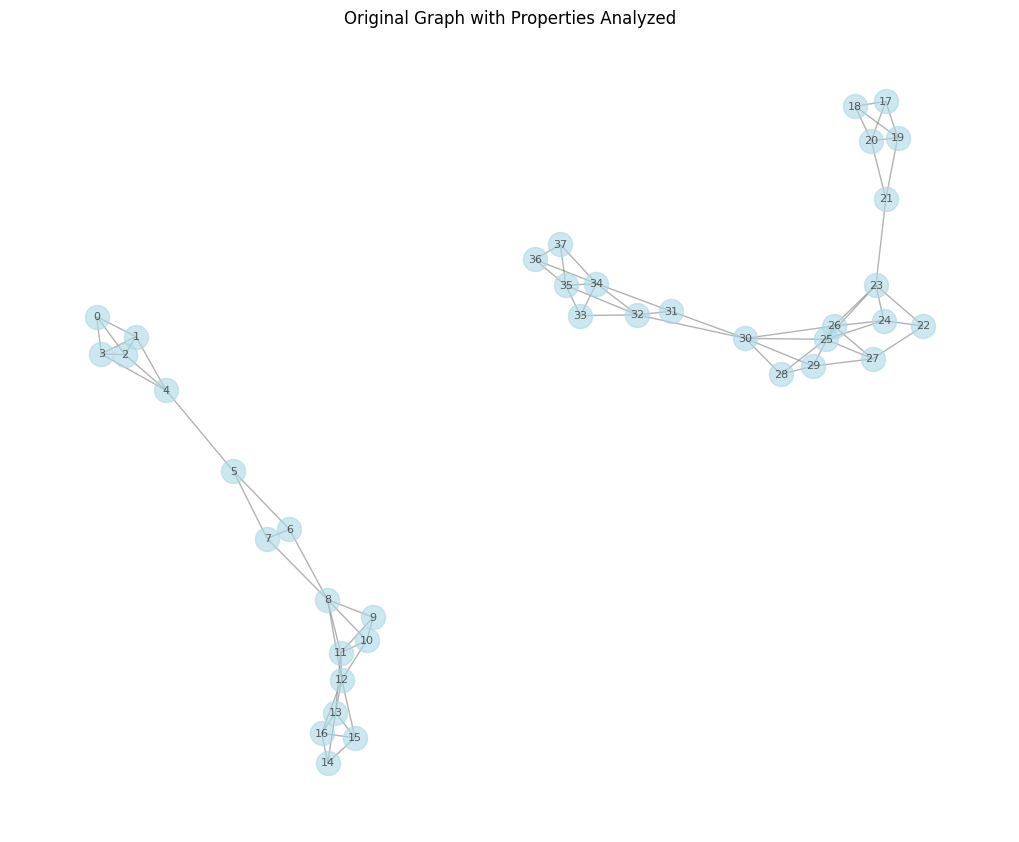

In [ ]:
import pickle
import dgl
import networkx as nx
import matplotlib.pyplot as plt
from dgl import to_networkx

# Load the first graph from a .pkl file
def load_first_graph(pkl_path):
    with open(pkl_path, 'rb') as f:
        graphs = pickle.load(f)
    return graphs[0] if graphs else None

# Convert DGL graph to a simple undirected NetworkX graph
def convert_to_simple_graph(graph):
    if isinstance(graph, dgl.DGLGraph):
        nx_graph = to_networkx(graph)
    else:
        nx_graph = graph  # If already NetworkX, return as is

    # Ensure it's a simple undirected graph
    simple_graph = nx.Graph()
    simple_graph.add_edges_from(nx_graph.edges())
    simple_graph.add_nodes_from(nx_graph.nodes())

    return simple_graph

# Sparsifiers: Compute Graph Density (How Sparse the Graph Is)
def compute_sparsity(graph):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    
    if num_nodes > 1:
        density = nx.density(graph)  # Density = 2 * |E| / (|V| * (|V| - 1))
    else:
        density = 0  # Avoid division by zero

    return {
        "num_nodes": num_nodes,
        "num_edges": num_edges,
        "density": density
    }

# Graph Components: Find Connected Components
def get_connected_components(graph):
    components = list(nx.connected_components(graph))
    component_sizes = [len(comp) for comp in components]  # Size of each component
    largest_component = max(component_sizes) if component_sizes else 0

    return {
        "num_components": len(components),
        "largest_component_size": largest_component,
        "all_component_sizes": component_sizes
    }

# Compute Centrality Measures (Degree, Betweenness, Eigenvector)
def compute_centrality(graph):
    return {
        "degree": nx.degree_centrality(graph),
        "betweenness": nx.betweenness_centrality(graph),
        "eigenvector": nx.eigenvector_centrality(graph, max_iter=1000)
    }

# Compute Range-Limited Centrality (Closeness within 3-hop neighborhoods)
def range_limited_centrality(graph, max_distance=3):
    closeness = {}
    for node in graph.nodes():
        subgraph = nx.ego_graph(graph, node, radius=max_distance)
        node_closeness = nx.closeness_centrality(subgraph)
        closeness[node] = node_closeness[node]  # Extract centrality of the main node

    return closeness

# Visualize the original graph
def visualize_graph(graph, title="Original Graph Visualization"):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, node_color="lightblue", edge_color="gray", alpha=0.6, with_labels=True, font_size=8)
    plt.title(title)
    plt.show()

# Main function:
def analyze_graph_properties(pkl_path):
    graph = load_first_graph(pkl_path)
    if graph is None:
        print("No graphs found in the file!")
        return

    print("\n **Original Graph Info:**", graph)

    # Convert DGL to NetworkX format
    nx_graph = convert_to_simple_graph(graph)

    # Compute sparsity
    sparsity_info = compute_sparsity(nx_graph)
    print("\n **Graph Sparsity Info:**")
    print(f"- Number of Nodes: {sparsity_info['num_nodes']}")
    print(f"- Number of Edges: {sparsity_info['num_edges']}")
    print(f"- Graph Density: {sparsity_info['density']:.5f}")

    # Connected Components
    component_info = get_connected_components(nx_graph)
    print("\n **Connected Components Info:**")
    print(f"- Number of Components: {component_info['num_components']}")
    print(f"- Largest Component Size: {component_info['largest_component_size']}")
    print(f"- Component Sizes: {component_info['all_component_sizes'][:10]} (showing first 10)")

    # Centrality Measures
    centrality = compute_centrality(nx_graph)
    print("\n **Centrality Measures (Top 5 Nodes by Degree):**")
    print(dict(list(sorted(centrality['degree'].items(), key=lambda x: x[1], reverse=True))[:5]))

    # Compute range-limited centrality
    range_centrality = range_limited_centrality(nx_graph)
    print("\n **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**")
    print(dict(list(sorted(range_centrality.items(), key=lambda x: x[1], reverse=True))[:5]))

    # Visualize the original graph (unchanged)
    visualize_graph(nx_graph, title="Original Graph with Properties Analyzed")

# Example usage (Replace with your .pkl file path)
pkl_file = '../data/Multi Level Jet Tagging/Emitter-Higgs_HToBB.pkl'
analyze_graph_properties(pkl_file)


/media/drive1/jettag/env_jet/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))



 **Original Graph Info:** Graph(num_nodes=38, num_edges=114,
      ndata_schemes={'feat': Scheme(shape=(16,), dtype=torch.float32)}
      edata_schemes={})

 **Graph Sparsity Info:**
- Number of Nodes: 38
- Number of Edges: 77
- Graph Density: 0.10953

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 21
- Component Sizes: [17, 21]

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(8): 0.16216216216216217, np.int64(12): 0.16216216216216217, np.int64(25): 0.16216216216216217, np.int64(26): 0.16216216216216217, np.int64(30): 0.16216216216216217}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(12): 0.6470588235294118, 0: 0.625, 17: 0.625, np.int64(18): 0.625, np.int64(4): 0.6153846153846154}


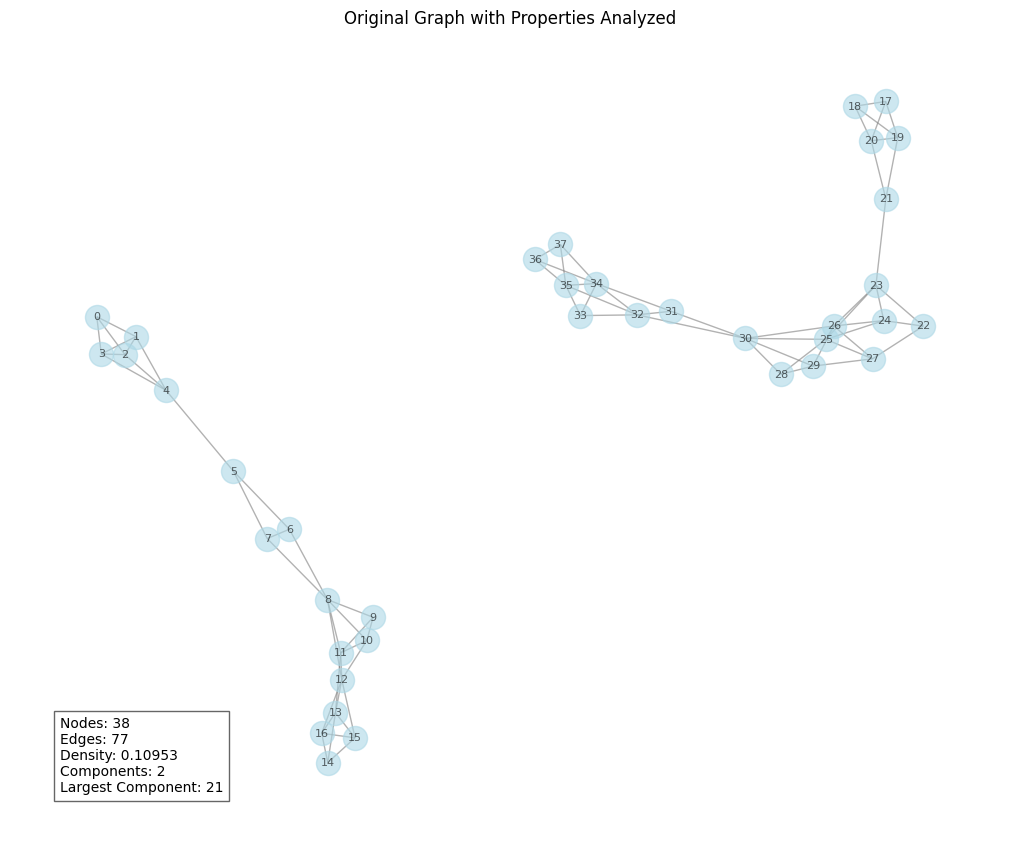

In [1]:
import pickle
import dgl
import networkx as nx
import matplotlib.pyplot as plt
from dgl import to_networkx

def load_first_graph(pkl_path):
    with open(pkl_path, 'rb') as f:
        graphs = pickle.load(f)
    return graphs[0] if graphs else None

def convert_to_simple_graph(graph):
    if isinstance(graph, dgl.DGLGraph):
        nx_graph = to_networkx(graph)
    else:
        nx_graph = graph
    simple_graph = nx.Graph()
    simple_graph.add_edges_from(nx_graph.edges())
    simple_graph.add_nodes_from(nx_graph.nodes())
    return simple_graph

def compute_sparsity(graph):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph) if num_nodes > 1 else 0
    return {"num_nodes": num_nodes, "num_edges": num_edges, "density": density}

def get_connected_components(graph):
    components = list(nx.connected_components(graph))
    component_sizes = [len(comp) for comp in components]
    largest_component = max(component_sizes) if component_sizes else 0
    return {"num_components": len(components), "largest_component_size": largest_component, "all_component_sizes": component_sizes}

def compute_centrality(graph):
    return {"degree": nx.degree_centrality(graph), "betweenness": nx.betweenness_centrality(graph), "eigenvector": nx.eigenvector_centrality(graph, max_iter=1000)}

def range_limited_centrality(graph, max_distance=3):
    closeness = {}
    for node in graph.nodes():
        subgraph = nx.ego_graph(graph, node, radius=max_distance)
        node_closeness = nx.closeness_centrality(subgraph)
        closeness[node] = node_closeness[node]
    return closeness

def visualize_graph(graph, title, sparsity_info, component_info, centrality):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, node_color="lightblue", edge_color="gray", alpha=0.6, with_labels=True, font_size=8)
    
    info_text = (f"Nodes: {sparsity_info['num_nodes']}\n"
                 f"Edges: {sparsity_info['num_edges']}\n"
                 f"Density: {sparsity_info['density']:.5f}\n"
                 f"Components: {component_info['num_components']}\n"
                 f"Largest Component: {component_info['largest_component_size']}")
    
    plt.text(0.05, 0.05, info_text, transform=plt.gca().transAxes, fontsize=10, 
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))
    plt.title(title)
    plt.show()

def analyze_graph_properties(pkl_path):
    graph = load_first_graph(pkl_path)
    if graph is None:
        print("No graphs found in the file!")
        return
    
    print("\n **Original Graph Info:**", graph)
    nx_graph = convert_to_simple_graph(graph)
    sparsity_info = compute_sparsity(nx_graph)
    print("\n **Graph Sparsity Info:**")
    print(f"- Number of Nodes: {sparsity_info['num_nodes']}")
    print(f"- Number of Edges: {sparsity_info['num_edges']}")
    print(f"- Graph Density: {sparsity_info['density']:.5f}")
    
    component_info = get_connected_components(nx_graph)
    print("\n **Connected Components Info:**")
    print(f"- Number of Components: {component_info['num_components']}")
    print(f"- Largest Component Size: {component_info['largest_component_size']}")
    print(f"- Component Sizes: {component_info['all_component_sizes']}")
    
    centrality = compute_centrality(nx_graph)
    print("\n **Centrality Measures (Top 5 Nodes by Degree):**")
    print(dict(list(sorted(centrality['degree'].items(), key=lambda x: x[1], reverse=True))[:5]))
    
    range_centrality = range_limited_centrality(nx_graph)
    print("\n **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**")
    print(dict(list(sorted(range_centrality.items(), key=lambda x: x[1], reverse=True))[:5]))
    
    visualize_graph(nx_graph, title="Original Graph with Properties Analyzed", 
                    sparsity_info=sparsity_info, component_info=component_info, 
                    centrality=centrality)

pkl_file = '../data/Multi Level Jet Tagging/Emitter-Higgs_HToBB.pkl'
analyze_graph_properties(pkl_file)


/media/drive1/jettag/env_jet/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))



 **Graph 1 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 38
- Number of Edges: 77
- Graph Density: 0.10953

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 21
- Component Sizes: [17, 21] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(8): 0.16216216216216217, np.int64(12): 0.16216216216216217, np.int64(25): 0.16216216216216217, np.int64(26): 0.16216216216216217, np.int64(30): 0.16216216216216217}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(12): 0.6470588235294118, 0: 0.625, 17: 0.625, np.int64(18): 0.625, np.int64(4): 0.6153846153846154}


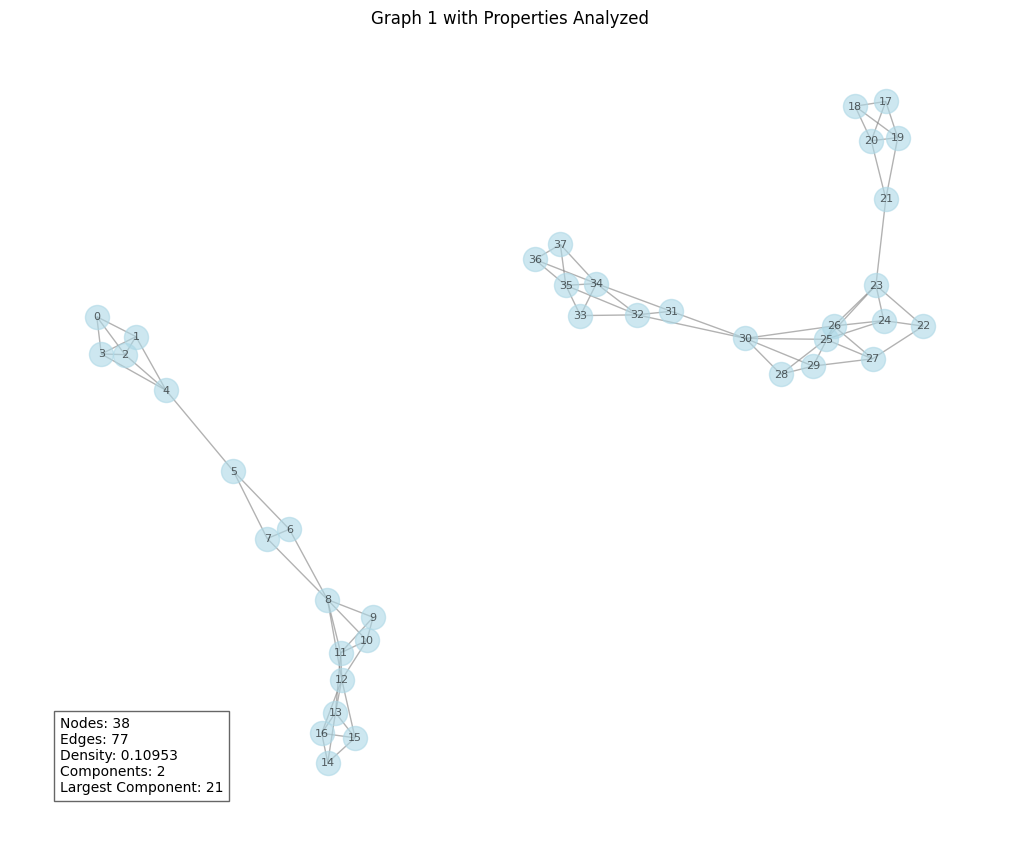


 **Graph 2 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 30
- Number of Edges: 59
- Graph Density: 0.13563

 **Connected Components Info:**
- Number of Components: 1
- Largest Component Size: 30
- Component Sizes: [30] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(3): 0.20689655172413793, np.int64(7): 0.20689655172413793, np.int64(4): 0.1724137931034483, np.int64(9): 0.1724137931034483, np.int64(11): 0.1724137931034483}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(3): 0.6111111111111112, np.int64(25): 0.6, np.int64(7): 0.5909090909090909, np.int64(26): 0.5833333333333334, np.int64(27): 0.5833333333333334}


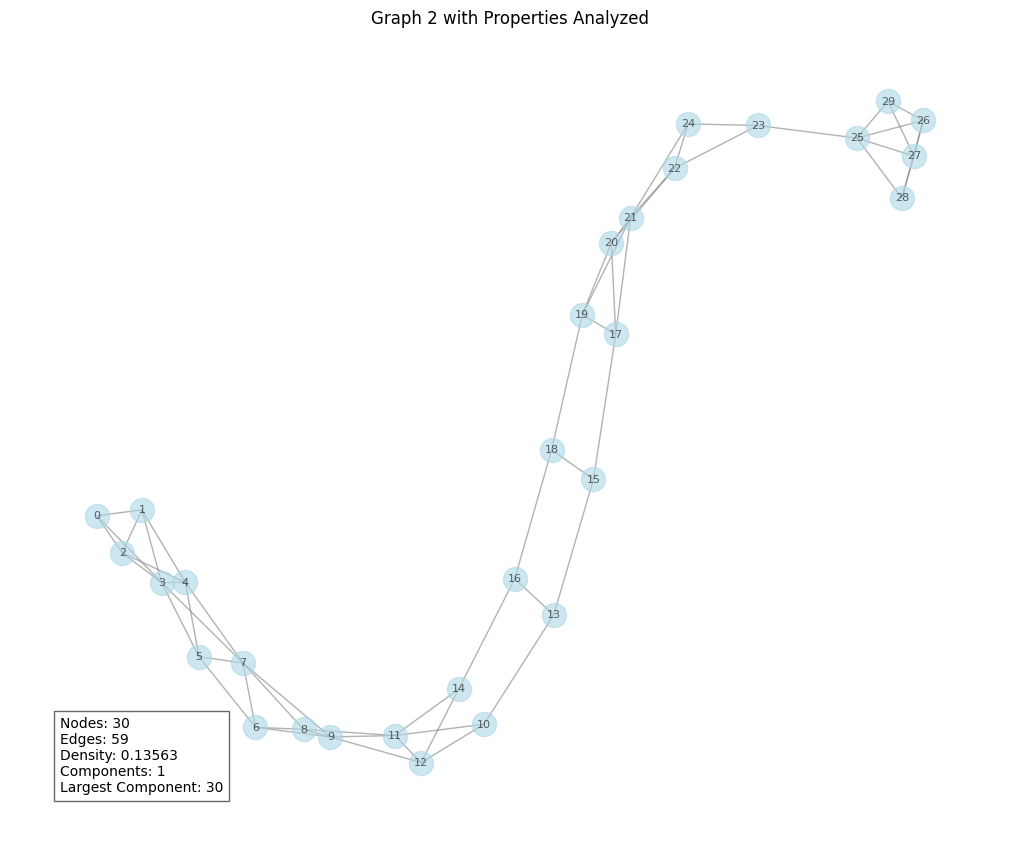


 **Graph 3 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 39
- Number of Edges: 79
- Graph Density: 0.10661

 **Connected Components Info:**
- Number of Components: 1
- Largest Component Size: 39
- Component Sizes: [39] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(21): 0.15789473684210525, np.int64(3): 0.13157894736842105, np.int64(4): 0.13157894736842105, 2: 0.13157894736842105, np.int64(6): 0.13157894736842105}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(37): 0.6363636363636364, np.int64(3): 0.6, np.int64(4): 0.6, np.int64(33): 0.6, np.int64(32): 0.5882352941176471}


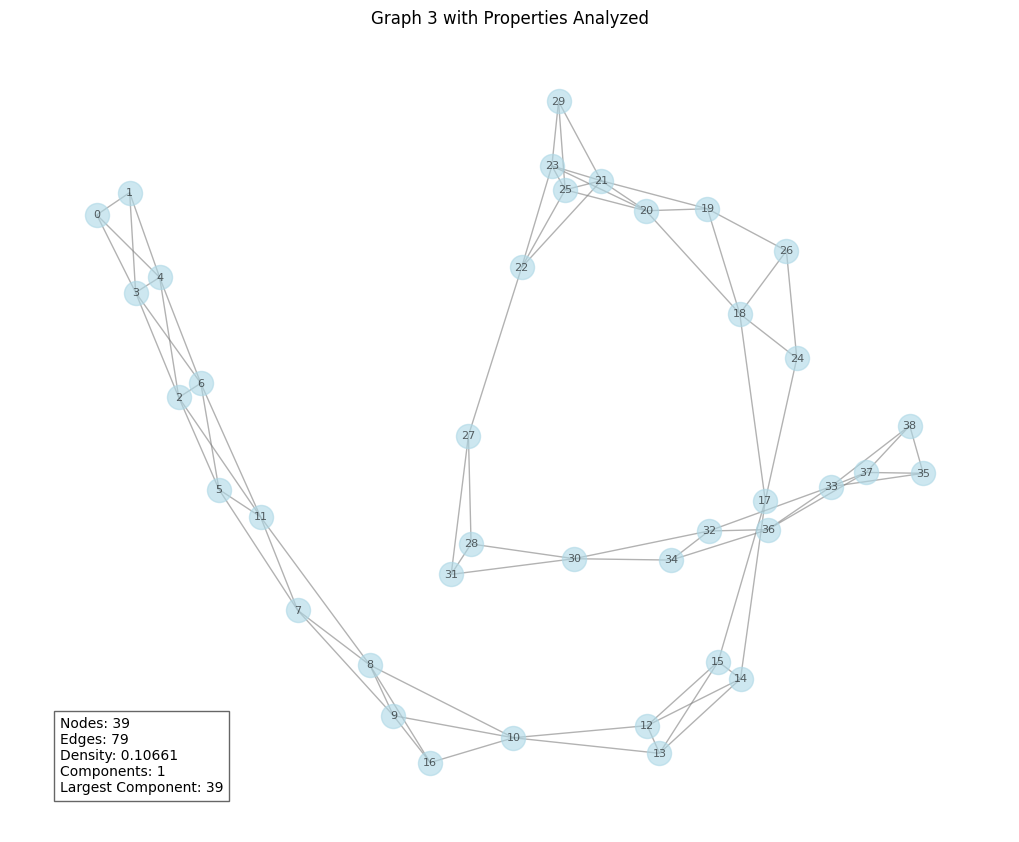


 **Graph 4 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 32
- Number of Edges: 63
- Graph Density: 0.12702

 **Connected Components Info:**
- Number of Components: 3
- Largest Component Size: 22
- Component Sizes: [22, 6, 4] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(4): 0.16129032258064516, np.int64(5): 0.16129032258064516, np.int64(7): 0.16129032258064516, np.int64(8): 0.16129032258064516, np.int64(9): 0.16129032258064516}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(23): 1.0, np.int64(27): 1.0, 28: 1.0, np.int64(29): 1.0, np.int64(30): 1.0}


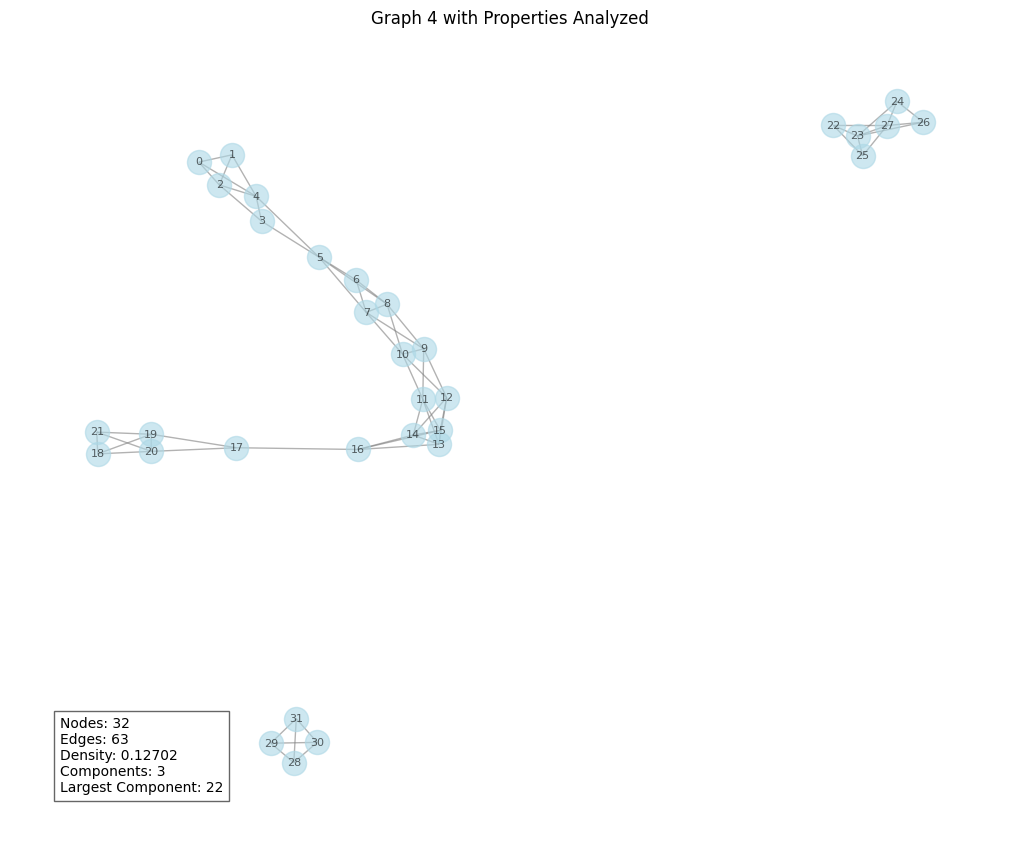


 **Graph 5 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 45
- Number of Edges: 93
- Graph Density: 0.09394

 **Connected Components Info:**
- Number of Components: 3
- Largest Component Size: 23
- Component Sizes: [8, 14, 23] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(40): 0.1590909090909091, np.int64(41): 0.1590909090909091, np.int64(28): 0.13636363636363635, np.int64(37): 0.13636363636363635, np.int64(42): 0.13636363636363635}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(2): 0.7777777777777778, np.int64(3): 0.7777777777777778, np.int64(4): 0.7777777777777778, np.int64(5): 0.7777777777777778, np.int64(1): 0.7}


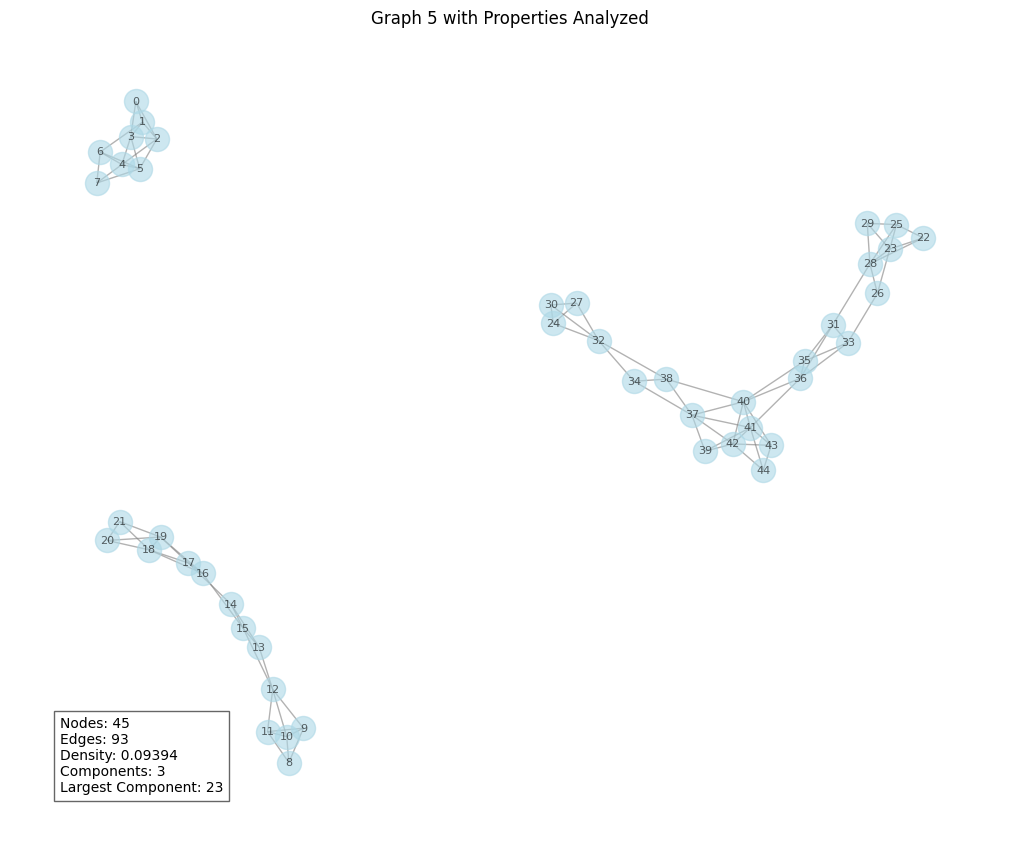


 **Graph 6 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 42
- Number of Edges: 89
- Graph Density: 0.10337

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 26
- Component Sizes: [16, 26] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(20): 0.17073170731707318, np.int64(34): 0.17073170731707318, np.int64(5): 0.14634146341463417, np.int64(23): 0.14634146341463417, np.int64(40): 0.14634146341463417}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(34): 0.7142857142857143, np.int64(20): 0.6875, np.int64(40): 0.6666666666666666, np.int64(35): 0.6428571428571429, np.int64(38): 0.6428571428571429}


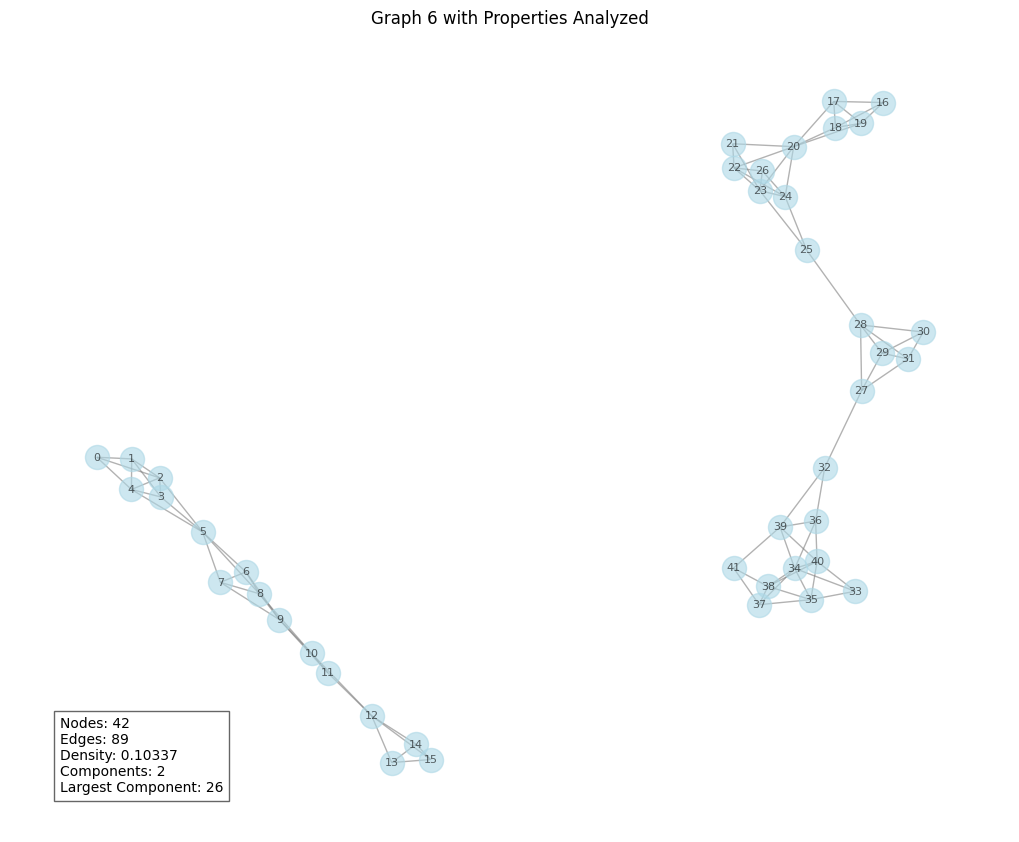


 **Graph 7 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 41
- Number of Edges: 83
- Graph Density: 0.10122

 **Connected Components Info:**
- Number of Components: 1
- Largest Component Size: 41
- Component Sizes: [41] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(37): 0.17500000000000002, np.int64(4): 0.15000000000000002, np.int64(9): 0.15000000000000002, np.int64(10): 0.15000000000000002, np.int64(26): 0.15000000000000002}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(34): 0.6666666666666666, np.int64(37): 0.631578947368421, np.int64(26): 0.625, np.int64(39): 0.625, np.int64(4): 0.6190476190476191}


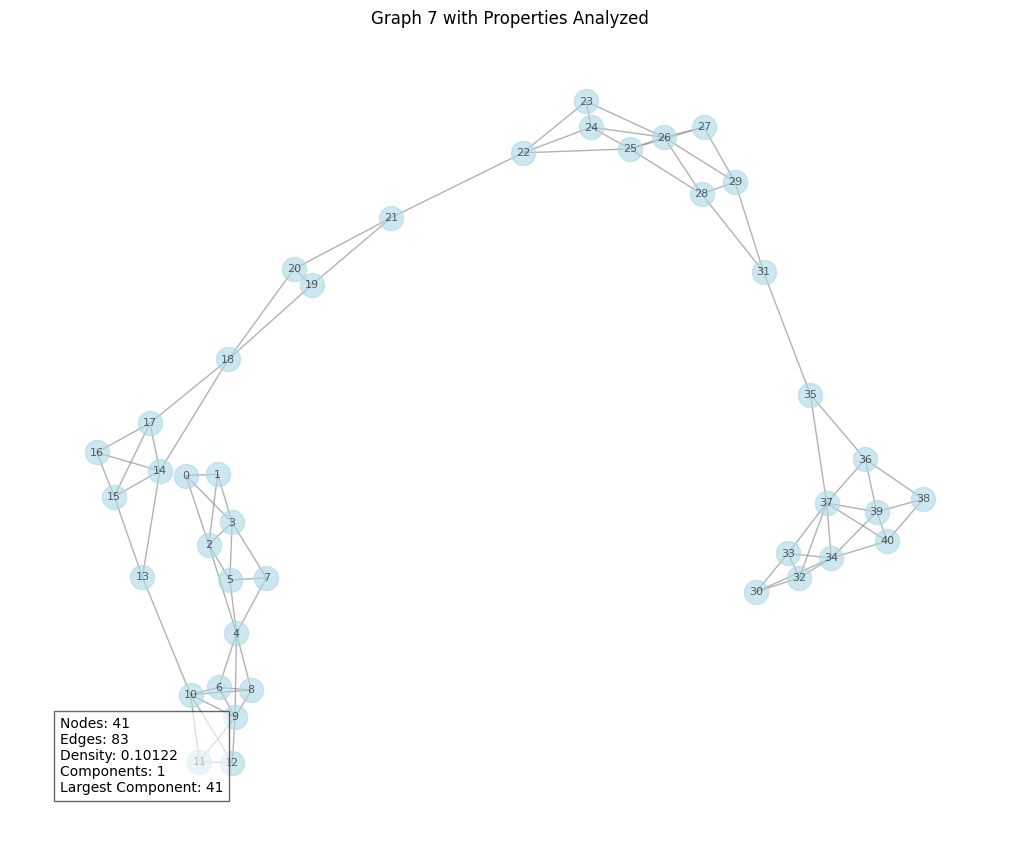


 **Graph 8 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 49
- Number of Edges: 103
- Graph Density: 0.08759

 **Connected Components Info:**
- Number of Components: 3
- Largest Component Size: 28
- Component Sizes: [15, 6, 28] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(39): 0.16666666666666666, np.int64(24): 0.14583333333333331, np.int64(27): 0.14583333333333331, np.int64(9): 0.125, np.int64(28): 0.125}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(17): 1.0, np.int64(18): 1.0, 15: 0.7142857142857143, np.int64(16): 0.7142857142857143, np.int64(19): 0.7142857142857143}


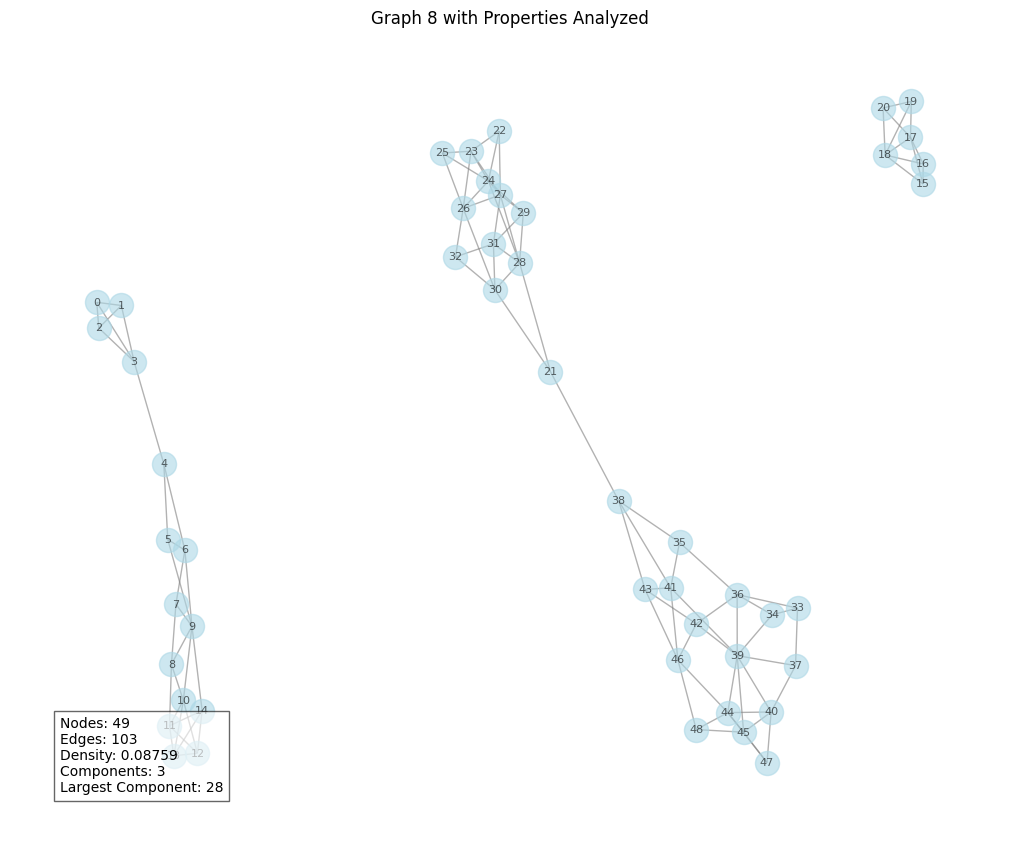


 **Graph 9 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 49
- Number of Edges: 97
- Graph Density: 0.08248

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 28
- Component Sizes: [21, 28] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(30): 0.14583333333333331, np.int64(32): 0.14583333333333331, np.int64(17): 0.125, np.int64(2): 0.10416666666666666, np.int64(5): 0.10416666666666666}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(2): 0.7, np.int64(46): 0.6666666666666666, 27: 0.625, np.int64(5): 0.6, 43: 0.6}


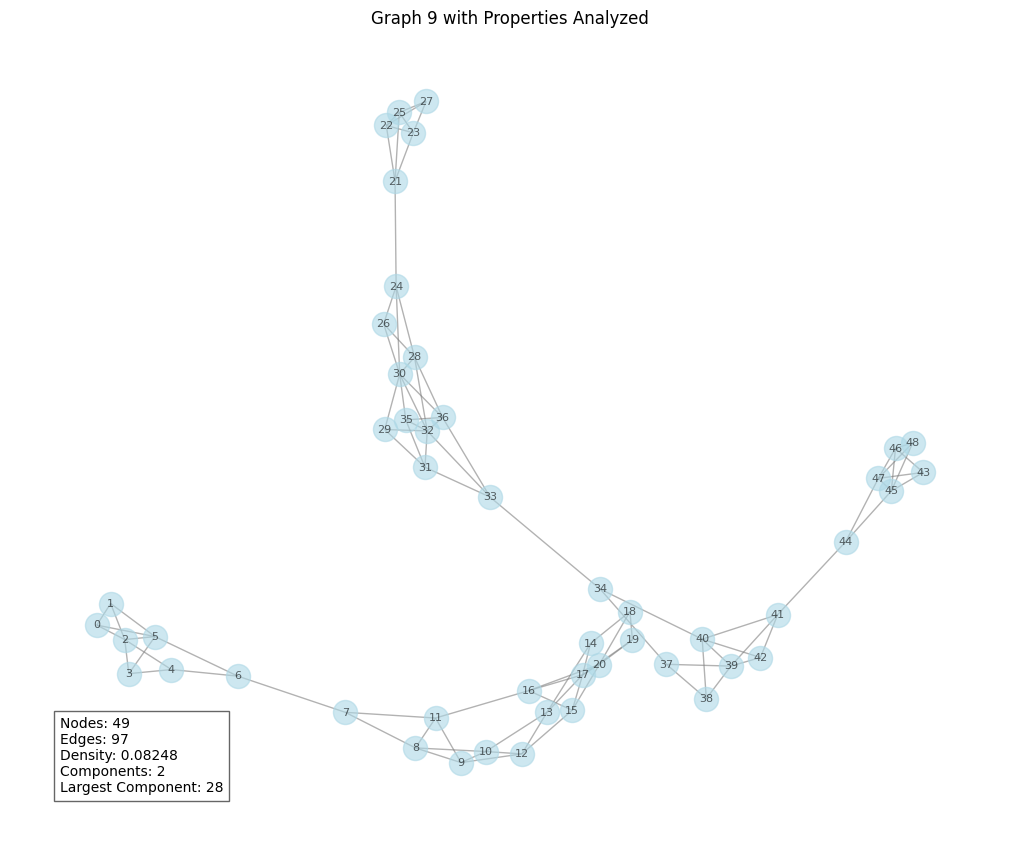


 **Graph 10 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 24
- Number of Edges: 45
- Graph Density: 0.16304

 **Connected Components Info:**
- Number of Components: 1
- Largest Component Size: 24
- Component Sizes: [24] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(4): 0.2608695652173913, 17: 0.2608695652173913, np.int64(7): 0.21739130434782608, np.int64(15): 0.21739130434782608, np.int64(1): 0.17391304347826086}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(4): 0.6666666666666666, 17: 0.6428571428571429, np.int64(22): 0.5833333333333334, 20: 0.5833333333333334, np.int64(23): 0.5833333333333334}


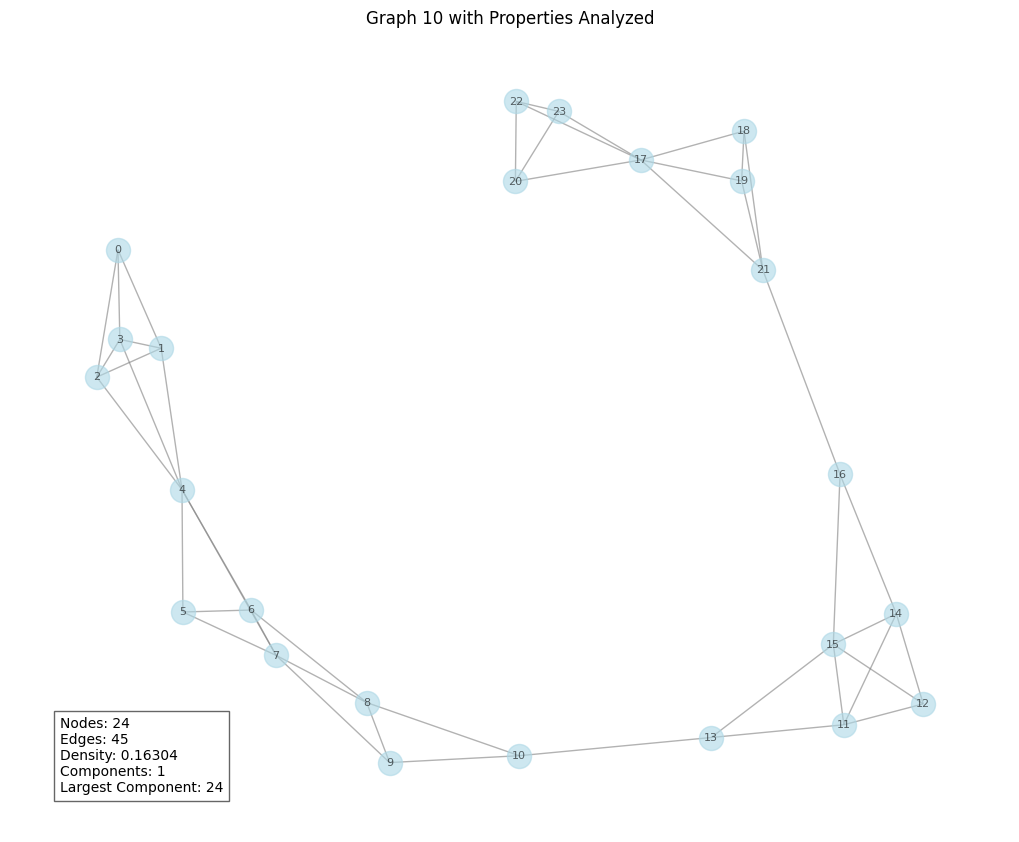


 **Graph 11 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 36
- Number of Edges: 72
- Graph Density: 0.11429

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 22
- Component Sizes: [22, 14] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(6): 0.17142857142857143, np.int64(17): 0.17142857142857143, np.int64(2): 0.14285714285714285, np.int64(3): 0.14285714285714285, np.int64(5): 0.14285714285714285}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(17): 0.6666666666666666, np.int64(5): 0.6111111111111112, np.int64(21): 0.6, np.int64(20): 0.6, np.int64(15): 0.5882352941176471}


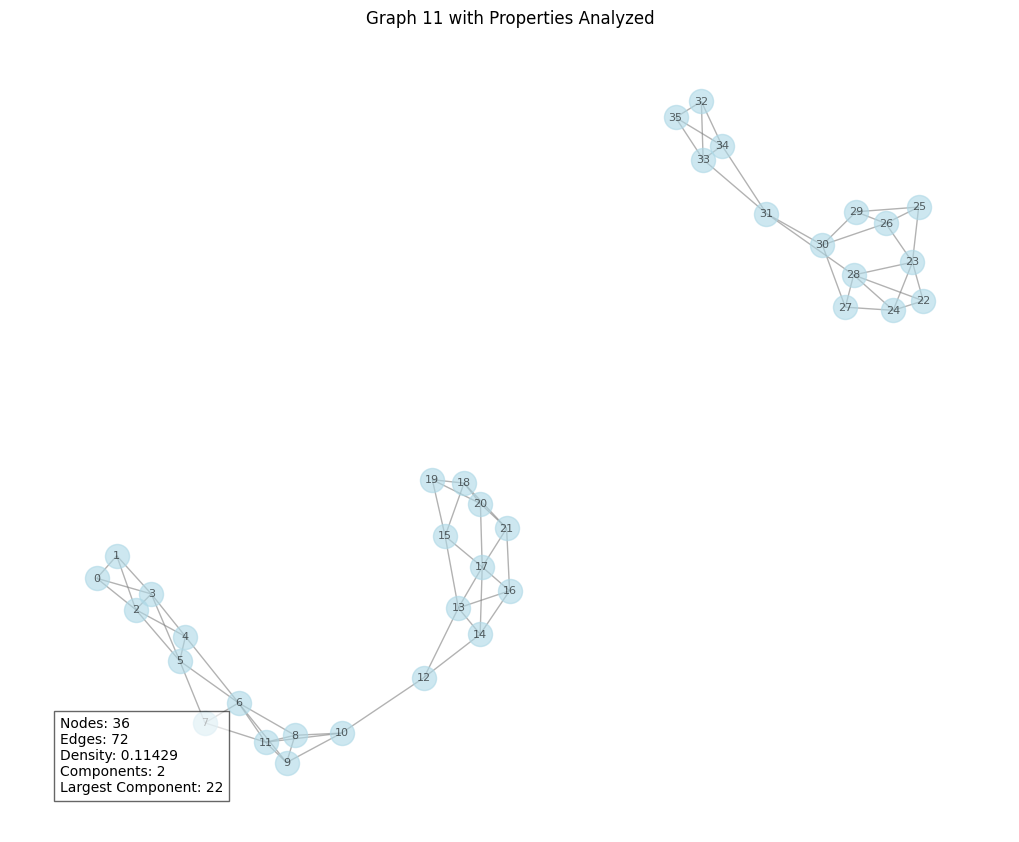


 **Graph 12 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 46
- Number of Edges: 91
- Graph Density: 0.08792

 **Connected Components Info:**
- Number of Components: 1
- Largest Component Size: 46
- Component Sizes: [46] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(15): 0.13333333333333333, np.int64(24): 0.13333333333333333, np.int64(41): 0.13333333333333333, np.int64(7): 0.11111111111111112, np.int64(10): 0.11111111111111112}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(41): 0.6666666666666666, np.int64(24): 0.5833333333333334, np.int64(3): 0.5625, np.int64(42): 0.5625, np.int64(43): 0.5625}


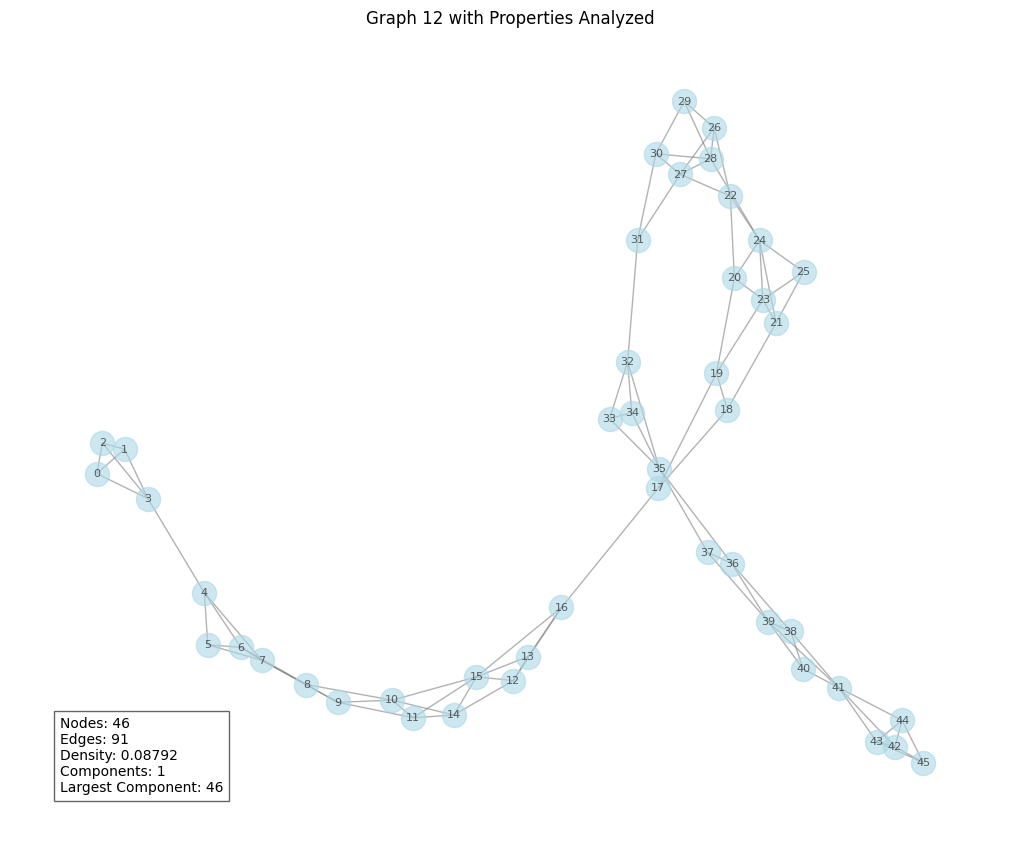


 **Graph 13 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 62
- Number of Edges: 125
- Graph Density: 0.06610

 **Connected Components Info:**
- Number of Components: 1
- Largest Component Size: 62
- Component Sizes: [62] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(23): 0.09836065573770492, np.int64(30): 0.09836065573770492, np.int64(52): 0.09836065573770492, np.int64(54): 0.09836065573770492, np.int64(58): 0.09836065573770492}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(4): 0.5882352941176471, np.int64(54): 0.5833333333333334, np.int64(5): 0.5714285714285714, np.int64(58): 0.5714285714285714, np.int64(3): 0.5555555555555556}


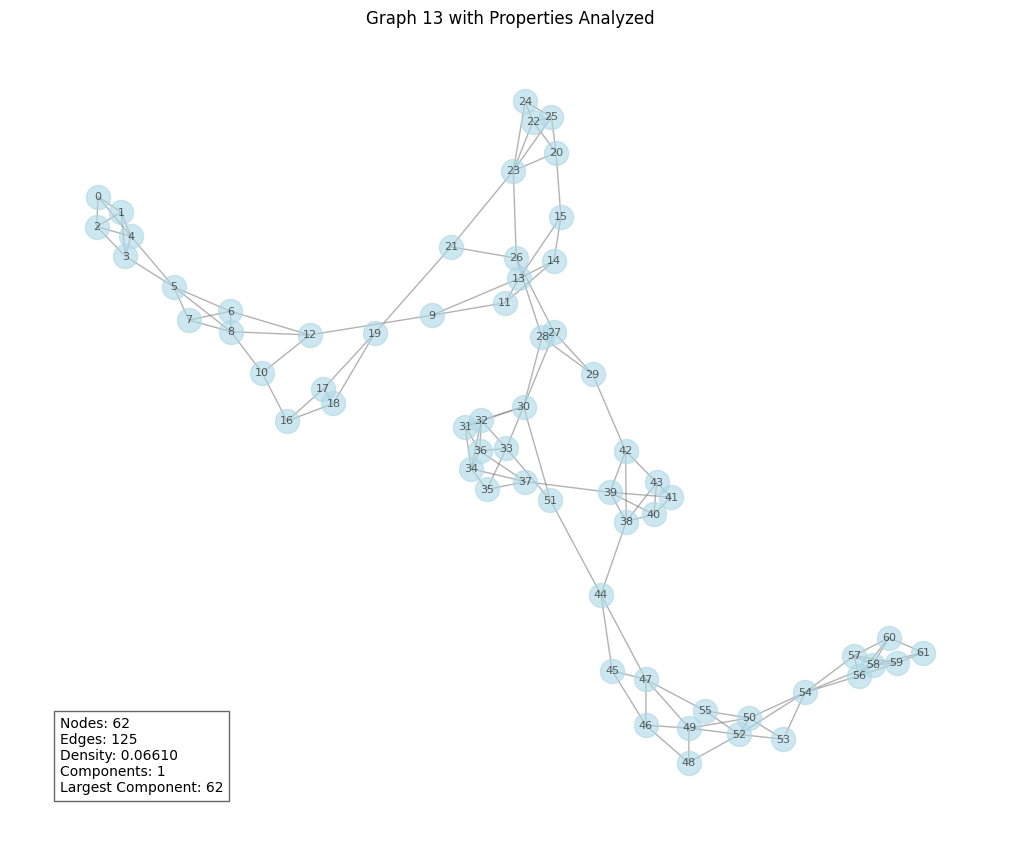


 **Graph 14 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 33
- Number of Edges: 68
- Graph Density: 0.12879

 **Connected Components Info:**
- Number of Components: 1
- Largest Component Size: 33
- Component Sizes: [33] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(4): 0.1875, np.int64(29): 0.1875, np.int64(2): 0.15625, np.int64(3): 0.15625, np.int64(8): 0.15625}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(4): 0.7272727272727273, np.int64(2): 0.6666666666666666, np.int64(5): 0.6153846153846154, np.int64(29): 0.6, 0: 0.5833333333333334}


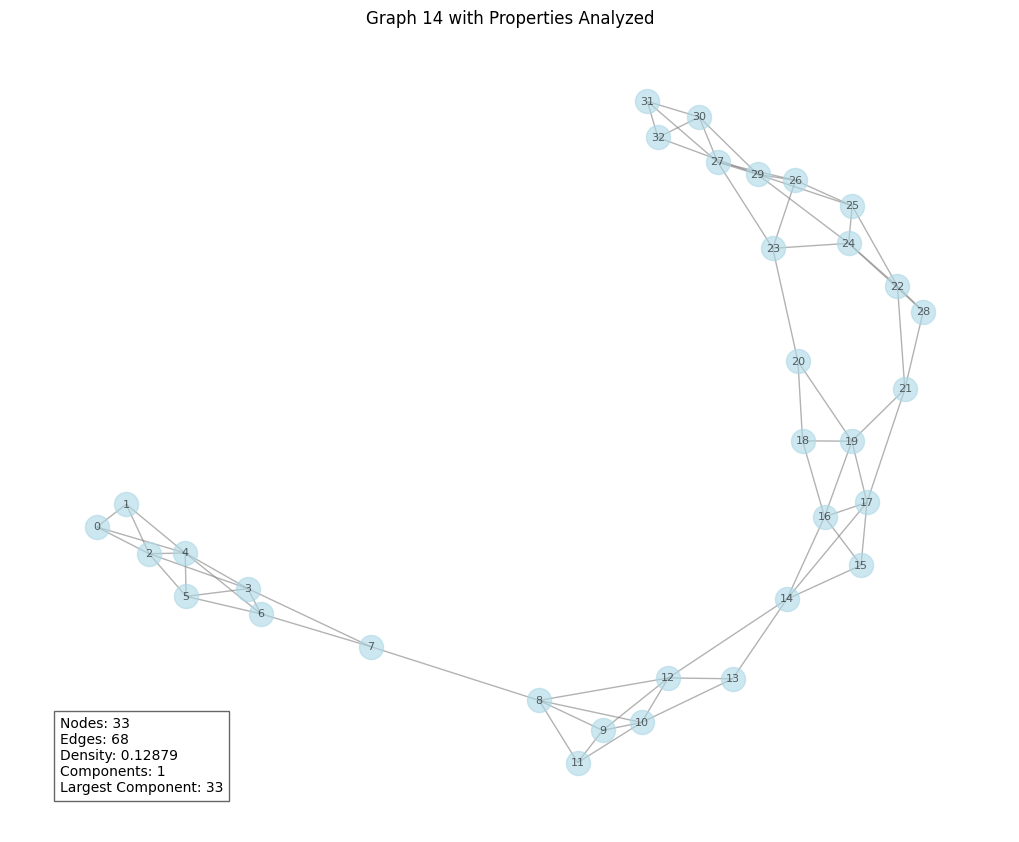


 **Graph 15 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 34
- Number of Edges: 66
- Graph Density: 0.11765

 **Connected Components Info:**
- Number of Components: 1
- Largest Component Size: 34
- Component Sizes: [34] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(14): 0.18181818181818182, np.int64(17): 0.18181818181818182, np.int64(19): 0.18181818181818182, np.int64(25): 0.18181818181818182, np.int64(2): 0.15151515151515152}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(2): 0.6153846153846154, np.int64(3): 0.6153846153846154, 0: 0.6, np.int64(1): 0.6, np.int64(17): 0.6}


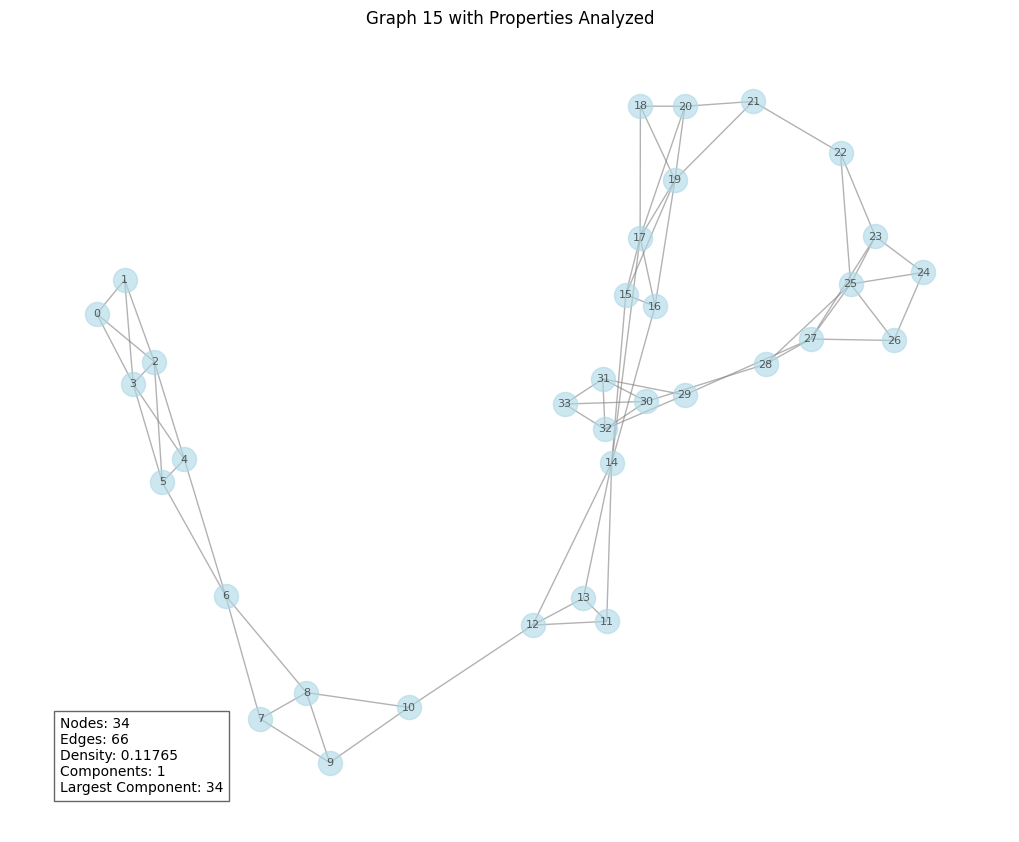


 **Graph 16 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 57
- Number of Edges: 113
- Graph Density: 0.07080

 **Connected Components Info:**
- Number of Components: 4
- Largest Component Size: 22
- Component Sizes: [6, 21, 8, 22] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(44): 0.14285714285714285, np.int64(51): 0.14285714285714285, np.int64(25): 0.125, np.int64(23): 0.10714285714285714, np.int64(38): 0.10714285714285714}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(2): 1.0, np.int64(3): 1.0, 0: 0.7142857142857143, np.int64(1): 0.7142857142857143, np.int64(4): 0.7142857142857143}


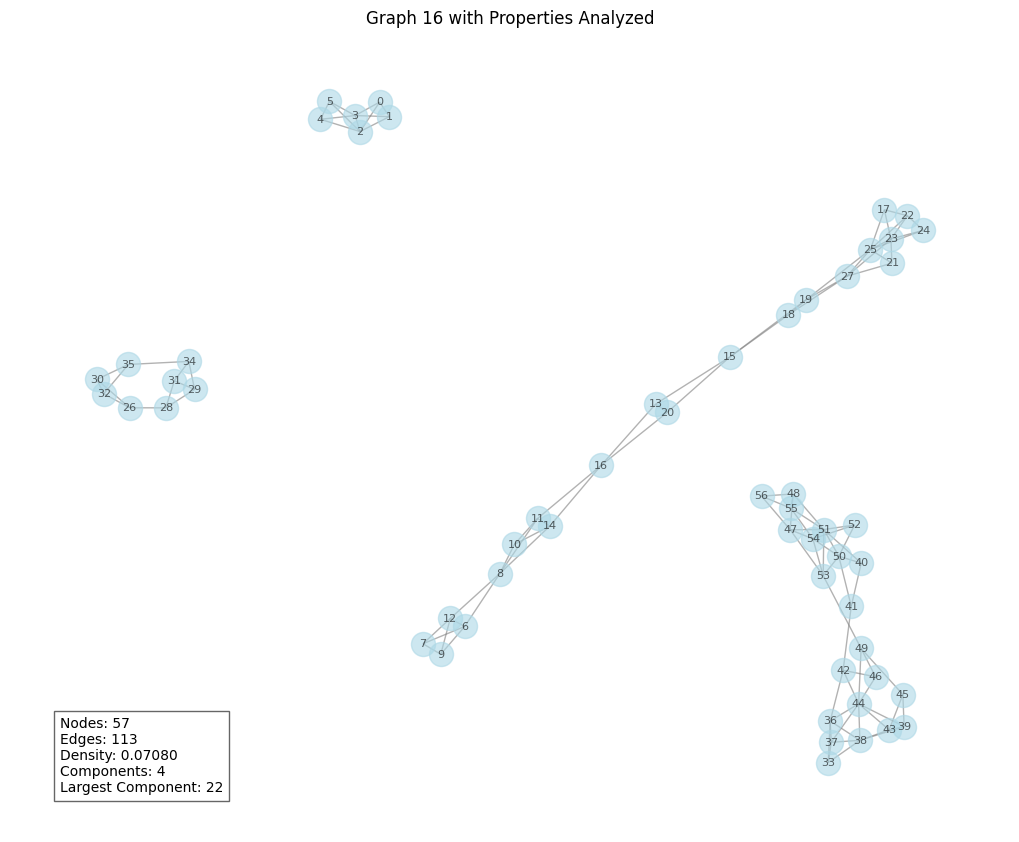


 **Graph 17 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 34
- Number of Edges: 73
- Graph Density: 0.13012

 **Connected Components Info:**
- Number of Components: 1
- Largest Component Size: 34
- Component Sizes: [34] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(3): 0.18181818181818182, np.int64(4): 0.18181818181818182, np.int64(8): 0.18181818181818182, np.int64(26): 0.18181818181818182, np.int64(28): 0.18181818181818182}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(3): 0.625, np.int64(4): 0.5652173913043478, np.int64(28): 0.5555555555555556, np.int64(25): 0.5454545454545454, np.int64(6): 0.5416666666666666}


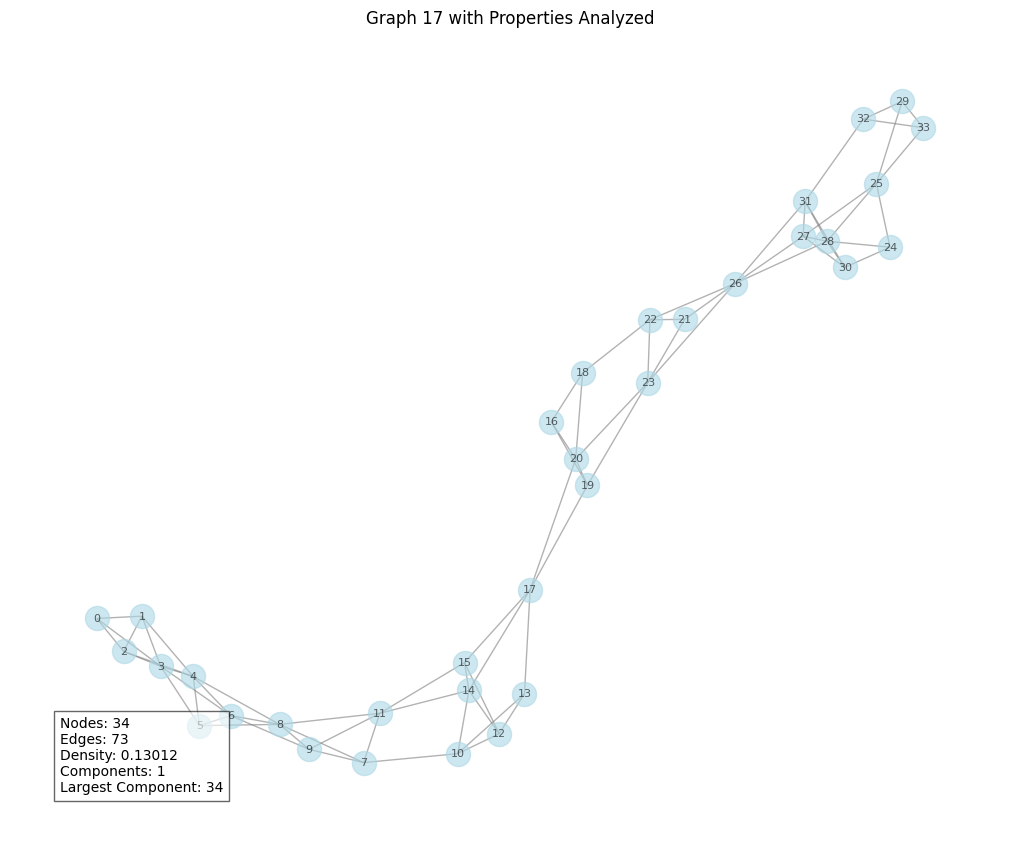


 **Graph 18 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 44
- Number of Edges: 87
- Graph Density: 0.09197

 **Connected Components Info:**
- Number of Components: 3
- Largest Component Size: 25
- Component Sizes: [8, 25, 11] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(13): 0.16279069767441862, np.int64(39): 0.16279069767441862, np.int64(3): 0.13953488372093023, np.int64(29): 0.13953488372093023, np.int64(36): 0.13953488372093023}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(3): 0.875, np.int64(4): 0.7777777777777778, np.int64(39): 0.7692307692307693, np.int64(2): 0.7, np.int64(5): 0.7}


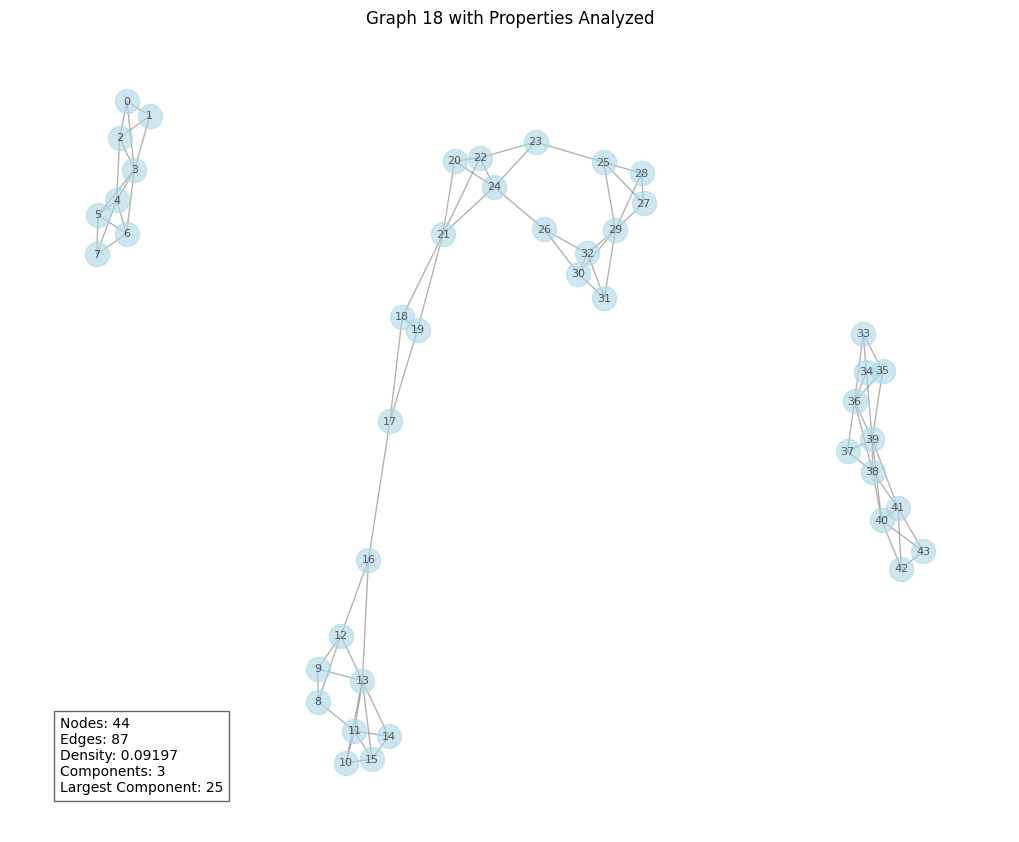


 **Graph 19 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 34
- Number of Edges: 64
- Graph Density: 0.11408

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 25
- Component Sizes: [25, 9] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(3): 0.18181818181818182, np.int64(27): 0.18181818181818182, np.int64(30): 0.18181818181818182, np.int64(10): 0.15151515151515152, np.int64(20): 0.15151515151515152}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(27): 0.8, np.int64(30): 0.8, np.int64(28): 0.7272727272727273, np.int64(31): 0.6666666666666666, np.int64(32): 0.6666666666666666}


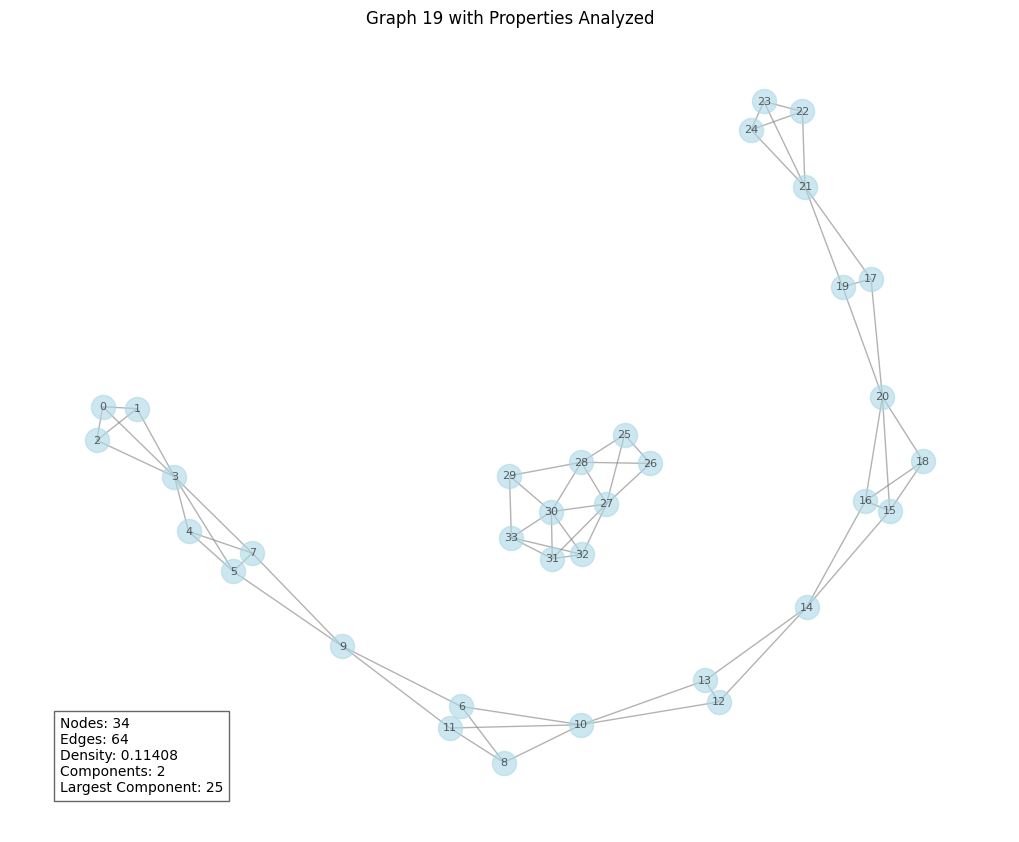


 **Graph 20 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 35
- Number of Edges: 71
- Graph Density: 0.11933

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 28
- Component Sizes: [7, 28] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(29): 0.2647058823529412, np.int64(28): 0.20588235294117646, np.int64(3): 0.1764705882352941, np.int64(25): 0.1764705882352941, np.int64(32): 0.1764705882352941}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(3): 1.0, np.int64(4): 0.8571428571428571, np.int64(1): 0.75, np.int64(2): 0.75, np.int64(29): 0.7058823529411765}


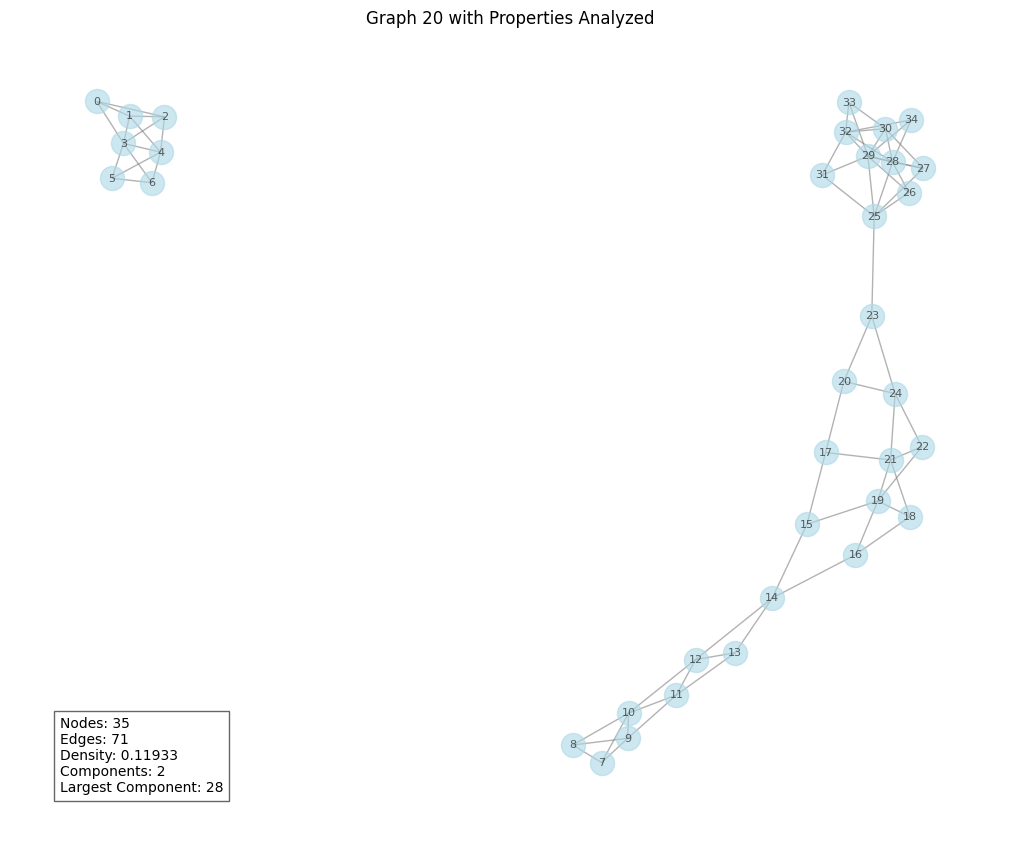


 **Graph 21 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 33
- Number of Edges: 67
- Graph Density: 0.12689

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 20
- Component Sizes: [13, 20] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(5): 0.1875, np.int64(8): 0.1875, np.int64(17): 0.1875, np.int64(20): 0.1875, np.int64(23): 0.1875}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(28): 0.6666666666666666, np.int64(5): 0.631578947368421, np.int64(31): 0.6153846153846154, np.int64(8): 0.6, np.int64(17): 0.5909090909090909}


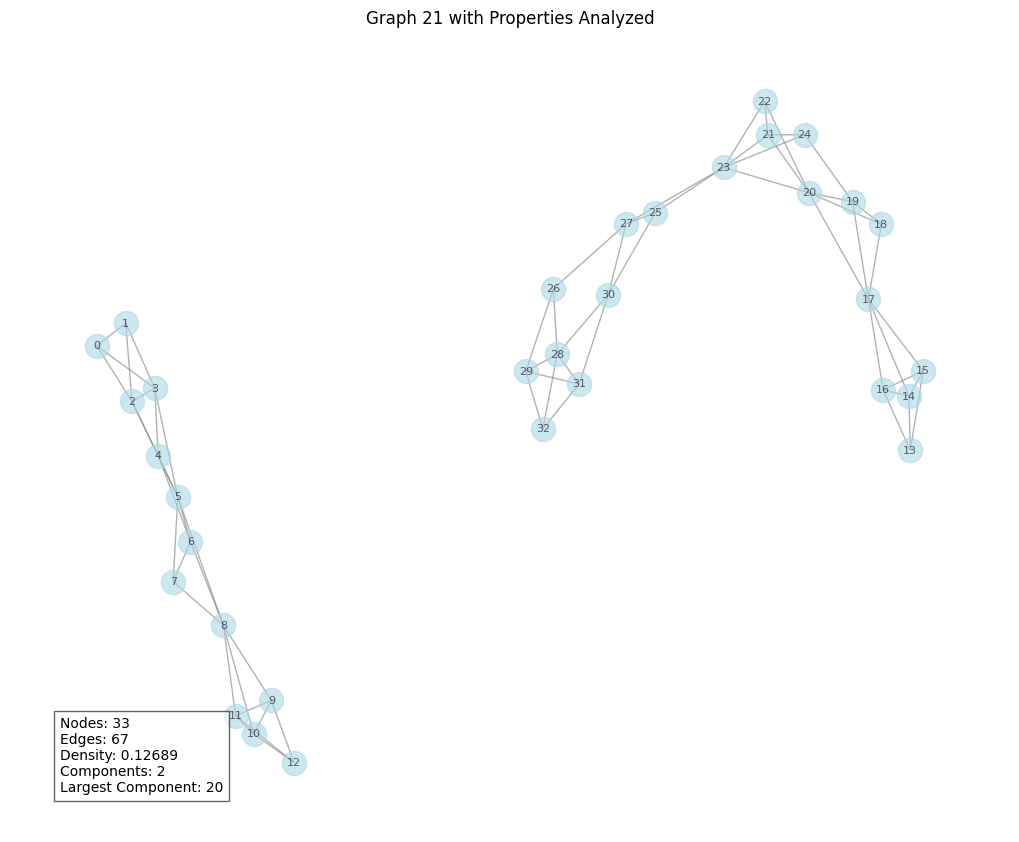


 **Graph 22 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 43
- Number of Edges: 85
- Graph Density: 0.09413

 **Connected Components Info:**
- Number of Components: 2
- Largest Component Size: 33
- Component Sizes: [10, 33] (showing first 10)

 **Centrality Measures (Top 5 Nodes by Degree):**
{np.int64(5): 0.16666666666666666, np.int64(6): 0.14285714285714285, np.int64(24): 0.14285714285714285, np.int64(3): 0.11904761904761904, np.int64(7): 0.11904761904761904}

 **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**
{np.int64(5): 0.8181818181818182, np.int64(6): 0.75, np.int64(3): 0.6923076923076923, np.int64(12): 0.6666666666666666, np.int64(2): 0.6428571428571429}


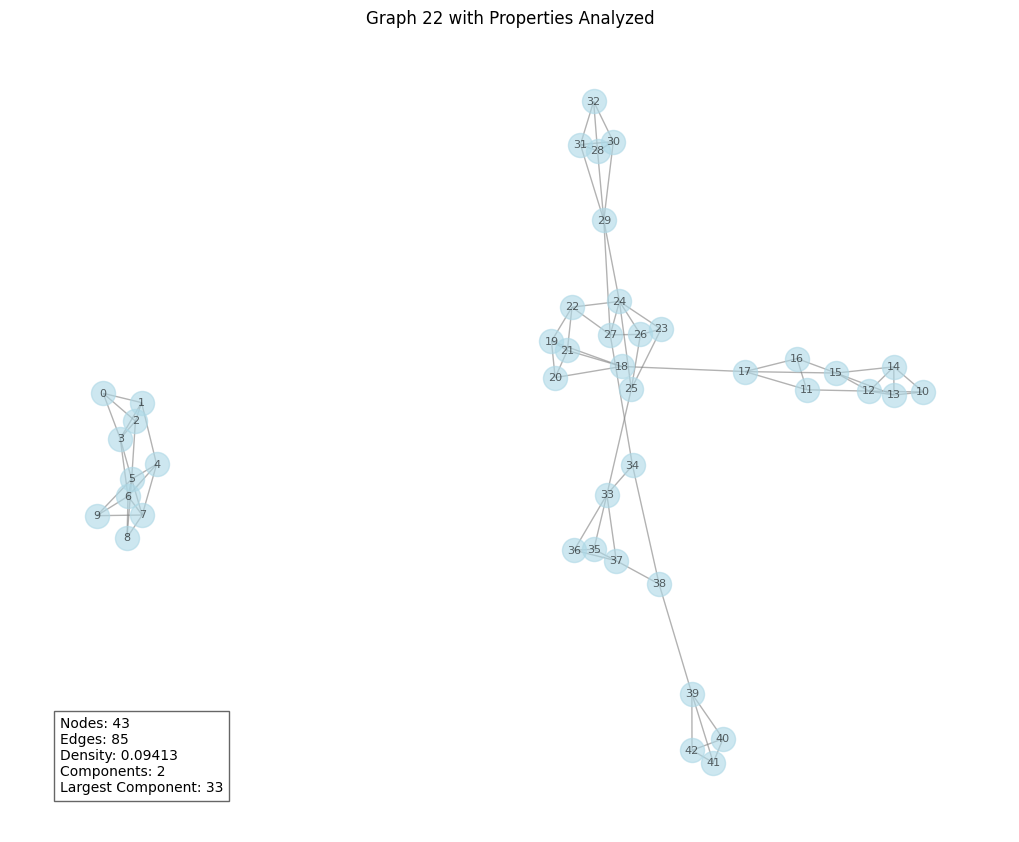


 **Graph 23 Info:**

 **Graph Sparsity Info:**
- Number of Nodes: 44
- Number of Edges: 84
- Graph Density: 0.08879

 **Connected Components Info:**
- Number of Components: 3
- Largest Component Size: 32
- Component Sizes: [5, 7, 32] (showing first 10)


PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

In [1]:
import pickle
import dgl
import networkx as nx
import matplotlib.pyplot as plt
from dgl import to_networkx

def load_graphs(pkl_path):
    with open(pkl_path, 'rb') as f:
        graphs = pickle.load(f)
    return graphs if graphs else []

def convert_to_simple_graph(graph):
    if isinstance(graph, dgl.DGLGraph):
        nx_graph = to_networkx(graph)
    else:
        nx_graph = graph
    simple_graph = nx.Graph()
    simple_graph.add_edges_from(nx_graph.edges())
    simple_graph.add_nodes_from(nx_graph.nodes())
    return simple_graph

def compute_sparsity(graph):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph) if num_nodes > 1 else 0
    return {"num_nodes": num_nodes, "num_edges": num_edges, "density": density}

def get_connected_components(graph):
    components = list(nx.connected_components(graph))
    component_sizes = [len(comp) for comp in components]
    largest_component = max(component_sizes) if component_sizes else 0
    return {"num_components": len(components), "largest_component_size": largest_component, "all_component_sizes": component_sizes}

def compute_centrality(graph):
    return {"degree": nx.degree_centrality(graph), "betweenness": nx.betweenness_centrality(graph), "eigenvector": nx.eigenvector_centrality(graph, max_iter=1000)}

def range_limited_centrality(graph, max_distance=3):
    closeness = {}
    for node in graph.nodes():
        subgraph = nx.ego_graph(graph, node, radius=max_distance)
        node_closeness = nx.closeness_centrality(subgraph)
        closeness[node] = node_closeness[node]
    return closeness

def visualize_graph(graph, title, sparsity_info, component_info, centrality):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, node_color="lightblue", edge_color="gray", alpha=0.6, with_labels=True, font_size=8)
    
    info_text = (f"Nodes: {sparsity_info['num_nodes']}\n"
                 f"Edges: {sparsity_info['num_edges']}\n"
                 f"Density: {sparsity_info['density']:.5f}\n"
                 f"Components: {component_info['num_components']}\n"
                 f"Largest Component: {component_info['largest_component_size']}")
    
    plt.text(0.05, 0.05, info_text, transform=plt.gca().transAxes, fontsize=10, 
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))
    plt.title(title)
    plt.show()

def analyze_graph_properties(pkl_path):
    graphs = load_graphs(pkl_path)
    if not graphs:
        print("No graphs found in the file!")
        return
    
    for i, graph in enumerate(graphs):
        print(f"\n **Graph {i+1} Info:**")
        nx_graph = convert_to_simple_graph(graph)
        sparsity_info = compute_sparsity(nx_graph)
        print("\n **Graph Sparsity Info:**")
        print(f"- Number of Nodes: {sparsity_info['num_nodes']}")
        print(f"- Number of Edges: {sparsity_info['num_edges']}")
        print(f"- Graph Density: {sparsity_info['density']:.5f}")
        
        component_info = get_connected_components(nx_graph)
        print("\n **Connected Components Info:**")
        print(f"- Number of Components: {component_info['num_components']}")
        print(f"- Largest Component Size: {component_info['largest_component_size']}")
        print(f"- Component Sizes: {component_info['all_component_sizes'][:10]} (showing first 10)")
        
        centrality = compute_centrality(nx_graph)
        print("\n **Centrality Measures (Top 5 Nodes by Degree):**")
        print(dict(list(sorted(centrality['degree'].items(), key=lambda x: x[1], reverse=True))[:5]))
        
        range_centrality = range_limited_centrality(nx_graph)
        print("\n **Range-Limited Closeness Centrality (Top 5 Nodes by Influence):**")
        print(dict(list(sorted(range_centrality.items(), key=lambda x: x[1], reverse=True))[:5]))
        
        visualize_graph(nx_graph, title=f"Graph {i+1} with Properties Analyzed", 
                        sparsity_info=sparsity_info, component_info=component_info, 
                        centrality=centrality)

pkl_file = '../data/Multi Level Jet Tagging/Emitter-Higgs_HToBB.pkl'
analyze_graph_properties(pkl_file)
